# **Capstone project: Providing data-driven suggestions for HR**

## Description and deliverables

This capstone project is an opportunity for you to analyze a dataset and build predictive models that can provide insights to the Human Resources (HR) department of a large consulting firm.

Upon completion, you will have two artifacts that you would be able to present to future employers. One is a brief one-page summary of this project that you would present to external stakeholders as the data professional in Salifort Motors. The other is a complete code notebook provided here. Please consider your prior course work and select one way to achieve this given project question. Either use a regression model or machine learning model to predict whether or not an employee will leave the company. The exemplar following this actiivty shows both approaches, but you only need to do one.

In your deliverables, you will include the model evaluation (and interpretation if applicable), a data visualization(s) of your choice that is directly related to the question you ask, ethical considerations, and the resources you used to troubleshoot and find answers or solutions.


# **PACE stages**


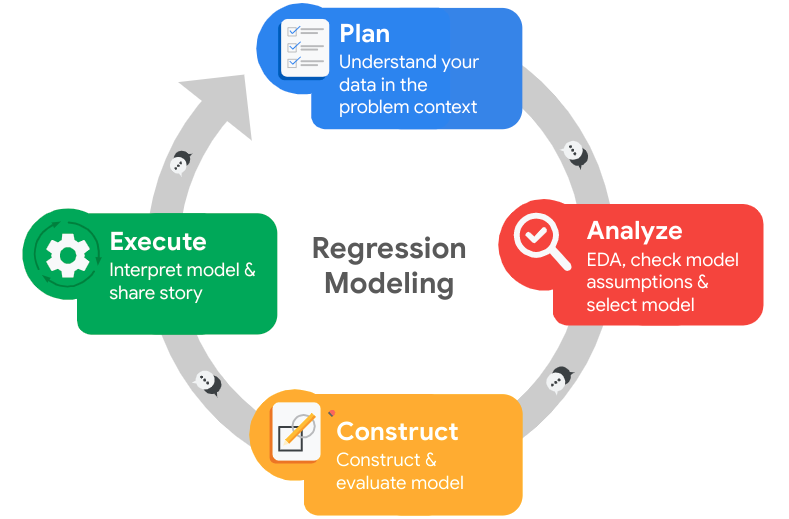

## **Pace: Plan**



### Understand the business scenario and problem

The HR department at Salifort Motors wants to take some initiatives to improve employee satisfaction levels at the company. They collected data from employees, but now they don’t know what to do with it. They refer to you as a data analytics professional and ask you to provide data-driven suggestions based on your understanding of the data. They have the following question: what’s likely to make the employee leave the company?

Your goals in this project are to analyze the data collected by the HR department and to build a model that predicts whether or not an employee will leave the company.

If you can predict employees likely to quit, it might be possible to identify factors that contribute to their leaving. Because it is time-consuming and expensive to find, interview, and hire new employees, increasing employee retention will be beneficial to the company.

### Familiarize yourself with the HR dataset

The dataset that you'll be using in this lab contains 15,000 rows and 10 columns for the variables listed below. 

**Note:** you don't need to download any data to complete this lab. For more information about the data, refer to its source on [Kaggle](https://www.kaggle.com/datasets/mfaisalqureshi/hr-analytics-and-job-prediction?select=HR_comma_sep.csv).

Variable  |Description |
-----|-----|
satisfaction_level|Employee-reported job satisfaction level [0&ndash;1]|
last_evaluation|Score of employee's last performance review [0&ndash;1]|
number_project|Number of projects employee contributes to|
average_monthly_hours|Average number of hours employee worked per month|
time_spend_company|How long the employee has been with the company (years)
Work_accident|Whether or not the employee experienced an accident while at work
left|Whether or not the employee left the company
promotion_last_5years|Whether or not the employee was promoted in the last 5 years
Department|The employee's department
salary|The employee's salary (U.S. dollars)

💭



## Step 1. Imports

*   Import packages
*   Load dataset



### Import packages

In [76]:
# Import packages
### YOUR CODE HERE ### 
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from matplotlib.ticker import StrMethodFormatter
from sklearn.model_selection import train_test_split
import sklearn.metrics as metrics
from sklearn.metrics import RocCurveDisplay
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import classification_report
from sklearn.metrics import recall_score, precision_score, f1_score, accuracy_score, make_scorer
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import PredefinedSplit
from xgboost import XGBClassifier 
from xgboost import plot_importance

### Load dataset

`Pandas` is used to read a dataset called **`HR_capstone_dataset.csv`.**  As shown in this cell, the dataset has been automatically loaded in for you. You do not need to download the .csv file, or provide more code, in order to access the dataset and proceed with this lab. Please continue with this activity by completing the following instructions.

In [77]:
# RUN THIS CELL TO IMPORT YOUR DATA. 

# Load dataset into a dataframe
### YOUR CODE HERE ###
df0 = pd.read_csv("HR_capstone_dataset.csv")

# Display first few rows of the dataframe
### YOUR CODE HERE ###
df0.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


## Step 2. Data Exploration (Initial EDA and data cleaning)

- Understand your variables
- Clean your dataset (missing data, redundant data, outliers)



### Gather basic information about the data

In [78]:
# Gather basic information about the data
### YOUR CODE HERE ###
df0.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   Department             14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


### Gather descriptive statistics about the data

In [79]:
# Gather descriptive statistics about the data
### YOUR CODE HERE ###
df0.describe()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


### Rename columns

As a data cleaning step, rename the columns as needed. Standardize the column names so that they are all in `snake_case`, correct any column names that are misspelled, and make column names more concise as needed.

In [80]:
# Display all column names
### YOUR CODE HERE ###
df0.columns

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident', 'left',
       'promotion_last_5years', 'Department', 'salary'],
      dtype='object')

In [81]:
# Rename columns as needed
### YOUR CODE HERE ###
df0.rename(columns={'average_montly_hours':'average_monthly_hours','Work_accident':'work_accident','time_spend_company':'tenure','Department':'department','number_project':'project_numbers'},inplace=True)

# Display all column names after the update
### YOUR CODE HERE ###
df0.columns

Index(['satisfaction_level', 'last_evaluation', 'project_numbers',
       'average_monthly_hours', 'tenure', 'work_accident', 'left',
       'promotion_last_5years', 'department', 'salary'],
      dtype='object')

### Check missing values

Check for any missing values in the data.

In [82]:
# Check for missing values
### YOUR CODE HERE ###
df0.isna().sum()

satisfaction_level       0
last_evaluation          0
project_numbers          0
average_monthly_hours    0
tenure                   0
work_accident            0
left                     0
promotion_last_5years    0
department               0
salary                   0
dtype: int64

### Check duplicates

Check for any duplicate entries in the data.

In [83]:
# Check for duplicates
### YOUR CODE HERE ###
df0.duplicated().sum()

3008

In [84]:
# Inspect some rows containing duplicates as needed
### YOUR CODE HERE ###
df0[df0.duplicated()].head()

,satisfaction_level,last_evaluation,project_numbers,average_monthly_hours,tenure,work_accident,left,promotion_last_5years,department,salary
396,0.46,0.57,2,139,3,0,1,0,sales,low
866,0.41,0.46,2,128,3,0,1,0,accounting,low
1317,0.37,0.51,2,127,3,0,1,0,sales,medium
1368,0.41,0.52,2,132,3,0,1,0,RandD,low
1461,0.42,0.53,2,142,3,0,1,0,sales,low


In [85]:
# Drop duplicates and save resulting dataframe in a new variable as needed
### YOUR CODE HERE ###
df1 = df0.drop_duplicates()

# Display first few rows of new dataframe as needed
### YOUR CODE HERE ###
df1.head()

,satisfaction_level,last_evaluation,project_numbers,average_monthly_hours,tenure,work_accident,left,promotion_last_5years,department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


### Check outliers

Check for outliers in the data.

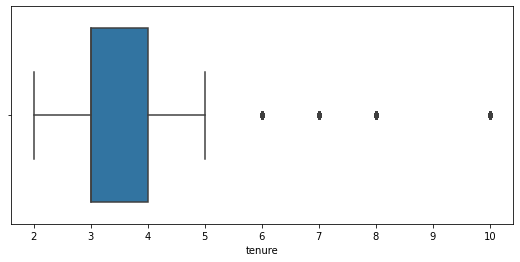

In [86]:
# Create a boxplot to visualize distribution of `tenure` and detect any outliers
### YOUR CODE HERE ###
plt.figure(figsize=(9,4))
sns.boxplot(x=df1['tenure']);

In [87]:
# Determine the number of rows containing outliers
### YOUR CODE HERE ###
percentile25 = df1['tenure'].quantile(0.25)
percentile75 = df1['tenure'].quantile(0.75)
iqr = percentile75 - percentile25

upper_limit = percentile75 + 1.5 * iqr
lower_limit = percentile25 - 1.5 * iqr

outliers = df1[(df1['tenure']<lower_limit)|(df1['tenure']>upper_limit)]
number_of_outliers = len(outliers)
number_of_outliers

824

Certain types of models are more sensitive to outliers than others. When you get to the stage of building your model, consider whether to remove outliers, based on the type of model you decide to use.

# pAce: Analyze Stage
- Perform EDA (analyze relationships between variables)



## Step 2. Data Exploration (Continue EDA)

Begin by understanding how many employees left and what percentage of all employees this figure represents.

In [88]:
# Get numbers of people who left vs. stayed
### YOUR CODE HERE ###
print(df1.groupby(by='left').size())
# Get percentages of people who left vs. stayed
### YOUR CODE HERE ###
print()
print(df1['left'].value_counts(normalize=True))

left
0    10000
1     1991
dtype: int64

0    0.833959
1    0.166041
Name: left, dtype: float64


### Data visualizations

Now, examine variables that you're interested in, and create plots to visualize relationships between variables in the data.

In [89]:
df1.head()

,satisfaction_level,last_evaluation,project_numbers,average_monthly_hours,tenure,work_accident,left,promotion_last_5years,department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


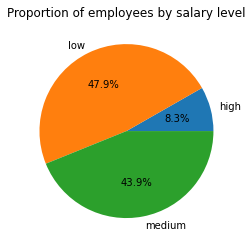

In [90]:
# Create a plot as needed
### YOUR CODE HERE ###
g1 = df1.groupby(by='salary').size().reset_index(name='number_of_employees')
labels = g1['salary']
sizes = g1['number_of_employees']
plt.pie(sizes,labels=labels,autopct='%1.1f%%')
plt.title('Proportion of employees by salary level')
plt.show()

**Insight 1:** <br>
The largest group of employees falls into the 'low' salary category (47.9%), followed closely by 'medium' category (43.9%). A small faction of employees fall in the 'high' salary category (~8.3%).

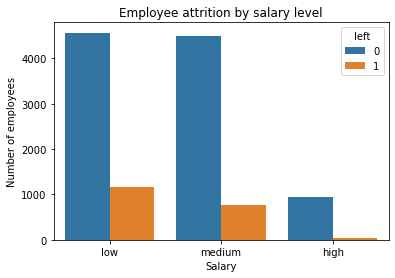

In [91]:
# Create a plot as needed
### YOUR CODE HERE ###
g2 = df1.groupby(['salary', 'left']).size().reset_index(name='number_of_employees')
order = ['low','medium','high']
sns.barplot(data=g2,x='salary',y='number_of_employees',hue='left',order=order)
plt.ylabel('Number of employees')
plt.xlabel('Salary')
plt.title('Employee attrition by salary level')
plt.show();

**Insight 2:** <br>
Employees that receive a high salary has very low attrition, indicating better retention among highly paid employees.

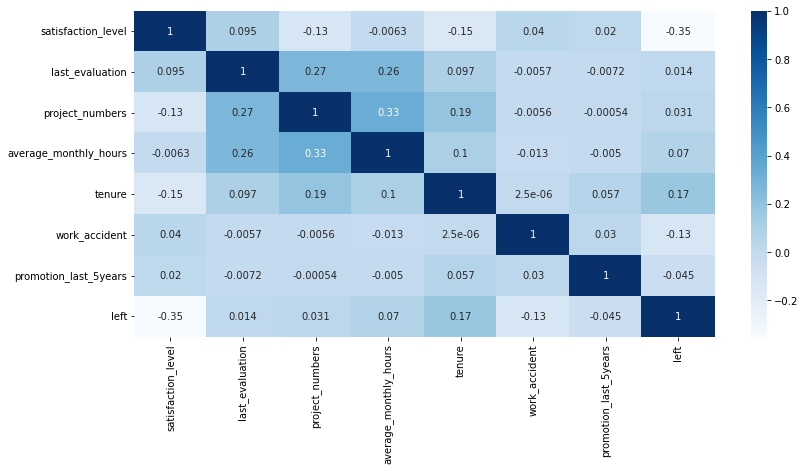

In [92]:
# Create a plot as needed
### YOUR CODE HERE ###
df1.head()
plt.figure(figsize=(13,6))
df2 = df1[['satisfaction_level','last_evaluation','project_numbers','average_monthly_hours','tenure','work_accident','promotion_last_5years','left']]
corr = df2.corr()
sns.heatmap(corr, annot=True, cmap='Blues');

**Insight 3:** <br>
With a correlation coefficient of -0.35, the most prominent factor influencing employee attrition is satisfaction level, which has a strong negative correlation with leaving the company. Employees with lower satisfaction are much more likely to leave. 

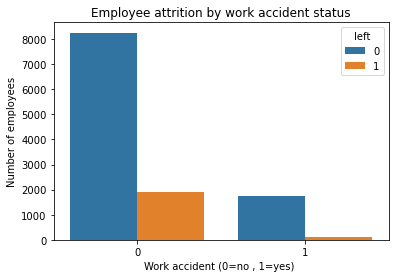

In [93]:
# Create a plot as needed
### YOUR CODE HERE ###
g3 = df1.groupby(['work_accident','left']).size().reset_index(name='number_of_employees')
sns.barplot(data=g3,x='work_accident',y='number_of_employees',hue='left')
plt.ylabel('Number of employees')
plt.xlabel('Work accident (0=no , 1=yes) ')
plt.title('Employee attrition by work accident status')
plt.show();

**Insight 4:** <br>
Contrary to what might be expected, experiencing a work accident does not lead to higher attrition among employees. Perhaps the company has strong policies in place to review these accidents, ensuring that these incidents will not be repeated again. This can reassure employees, making them feel safer and more confident about staying with the company. As a result, employees do not feel the need to leave simply because an accident occurred, since they trust that the company is committed to their well-being. 

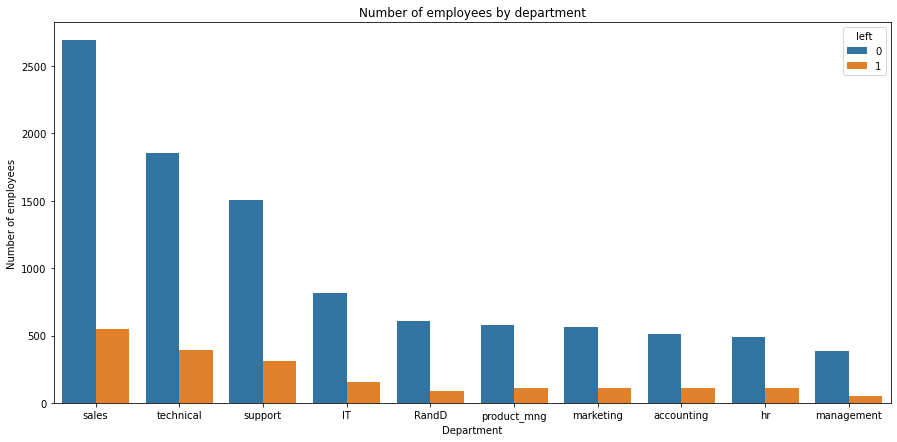

In [94]:
# Create a plot as needed
### YOUR CODE HERE ###
plt.figure(figsize=(15,7))
df3 = df1.groupby(['department','left']).size().reset_index(name='number_of_employees').sort_values(by='number_of_employees',ascending=False)
sns.barplot(data=df3,x='department',y='number_of_employees',hue='left')
plt.xlabel('Department')
plt.ylabel('Number of employees')
plt.title('Number of employees by department');

**Insight 5:** <br>
Across all departments, the number of employees who stayed is much higher than those who left. 

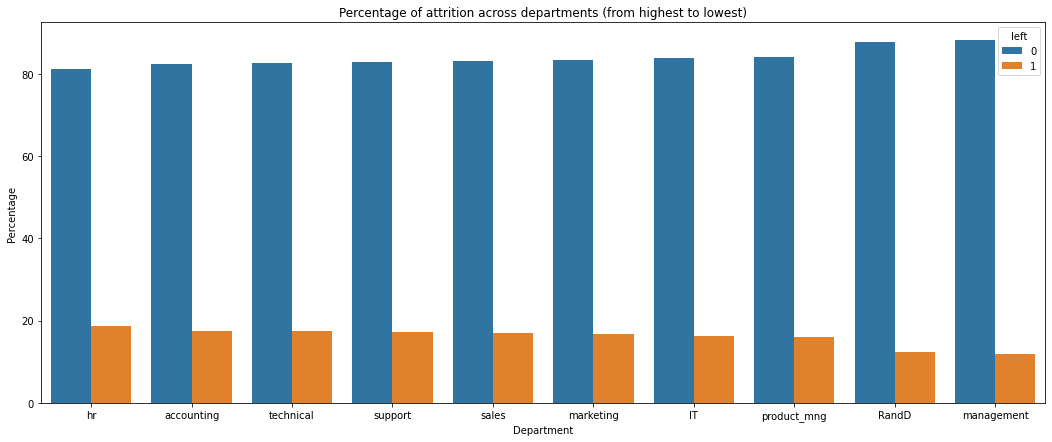

In [95]:
# Create a plot as needed
### YOUR CODE HERE ###
plt.figure(figsize=(18,7))
df4 = df1.groupby(['department','left']).size().reset_index(name='number_of_employees')
employees_by_department = df4.groupby('department')['number_of_employees'].sum().reset_index(name='total_employees')
df5 = pd.merge(df4,employees_by_department,on='department')
df5['percentage'] = df5['number_of_employees'] / df5['total_employees'] * 100
df5.sort_values('percentage',inplace=True)
plt.title('Percentage of attrition across departments (from highest to lowest)')
df6 = df5[df5['left']==1].sort_values('percentage',ascending=False)
order = df6['department'].to_list()
sns.barplot(data=df5,x='department',y='percentage',hue='left',order=order)
plt.xlabel('Department')
plt.ylabel('Percentage');

**Insight 6:** <br>
There are no departments with exceptionally high attrition. R&D and management departments have slightly better retention rates compared to other departments.

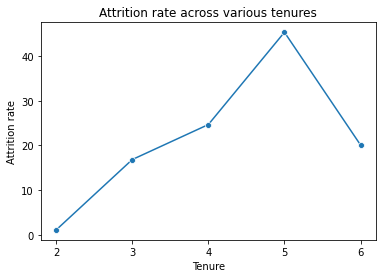

In [96]:
# Create a plot as needed
### YOUR CODE HERE ###
df7 = df1.groupby(['tenure','left']).size().reset_index(name='number_of_employees')
df7
df8 = df1.groupby(['tenure']).size().reset_index(name='total_employees')
df9= pd.merge(df7,df8,on='tenure')
df9 = df9[df9['left']==1]
df9['attrition_rate'] = df9['number_of_employees']/df9['total_employees']*100
plot = sns.lineplot(data=df9,x='tenure',y='attrition_rate',marker='o')
plot.set_xlabel('Tenure')
plot.set_ylabel('Attrition rate')
plt.xticks([2,3,4,5,6])
plt.title('Attrition rate across various tenures');

**Insight 7:** <br>
The attrition rate starts very low for employees with 2 years of tenure, increases steadily, and peaks sharply at 5 years. It then drops significantly at 6 years. To reduce attrition rates, HR strategies could be targeted at employees approaching the 5-year mark. Possible strategies include offering career advancement opportunities, which can perhaps lead to greater job satisfaction.

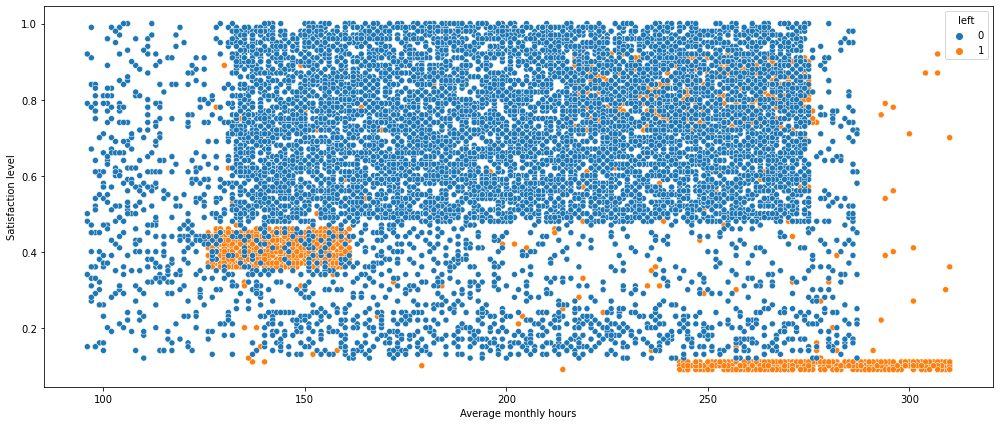

In [97]:
# Create a plot as needed
### YOUR CODE HERE ###
plt.figure(figsize=(17,7))
plt.xlabel('Average monthly hours')
plt.ylabel('Satisfaction level')
sns.scatterplot(data=df1,x='average_monthly_hours',y='satisfaction_level',hue='left');

**Insight 8:** <br>
Employees who left the company can be clustered into 3 groups: <br><br>
• A significant portion of employees who left the company had satisfaction levels close to 0 and worked between 240 and 320 hours a month. These workers were likely experiencing burnout, which accounts for their low job satisfaction and strong desire to leave the company.
<br><br>
• There is also a group of employees who work about 130 to 160 hours per month and report low satisfaction levels. The lower workload may signal a lack of responsibilities and assignments, leading these employees to believe they have limited opportunities for advancement. As a result, they may seek better career progression in other companies. 
<br><br>
• Lastly, another group of employees who left the company reported having high satisfaction levels, even though they worked moderately high monthly hours. These employees may have left the job not for better hours or satisfaction, but rather due to external circumstances such as family needs, retirement, health issues, or relocation. For these groups of employees, more reserach is needed to determine the underlying reasons.

# paCe: Construct Stage
- Determine which models are most appropriate
- Construct the model
- Confirm model assumptions
- Evaluate model results to determine how well your model fits the data


🔎



## Step 3. Model Building, Step 4. Results and Evaluation
- Fit a model that predicts the outcome variable using two or more independent variables
- Check model assumptions
- Evaluate the model

### Identify the type of prediction task.

The task is to predict whether an employee will leave the company. This is a classification task. 

### Identify the types of models most appropriate for this task.

Decision tree and XGBoost 

### Modeling



**Apply encoding**

In [98]:
data = df1.copy()
data['salary'] = data['salary'].astype('category').cat.set_categories(['low','medium','high']).cat.codes
data.head()

,satisfaction_level,last_evaluation,project_numbers,average_monthly_hours,tenure,work_accident,left,promotion_last_5years,department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,0
1,0.80,0.86,5,262,6,0,1,0,sales,1
2,0.11,0.88,7,272,4,0,1,0,sales,1
3,0.72,0.87,5,223,5,0,1,0,sales,0
4,0.37,0.52,2,159,3,0,1,0,sales,0


In [99]:
data = pd.get_dummies(data,drop_first=True)
data.head()

,satisfaction_level,last_evaluation,project_numbers,average_monthly_hours,tenure,work_accident,left,promotion_last_5years,salary,department_RandD,department_accounting,department_hr,department_management,department_marketing,department_product_mng,department_sales,department_support,department_technical
0,0.38,0.53,2,157,3,0,1,0,0,0,0,0,0,0,0,1,0,0
1,0.80,0.86,5,262,6,0,1,0,1,0,0,0,0,0,0,1,0,0
2,0.11,0.88,7,272,4,0,1,0,1,0,0,0,0,0,0,1,0,0
3,0.72,0.87,5,223,5,0,1,0,0,0,0,0,0,0,0,1,0,0
4,0.37,0.52,2,159,3,0,1,0,0,0,0,0,0,0,0,1,0,0


**Define the x and y variables:**

In [100]:
X = data.copy()
X.drop(['left'],axis=1,inplace=True)
y = data['left']

Separate the data into training, validating and testing data

In [101]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.25,stratify=y,random_state=0)
X_tr, X_val, y_tr, y_val = train_test_split(X_train, y_train, test_size = 0.25,stratify=y_train,random_state=0)
X_train.shape,X_test.shape,X_val.shape,y_train.shape,y_test.shape,y_val.shape

((8993, 17), (2998, 17), (2249, 17), (8993,), (2998,), (2249,))

**Using Decision Tree model**

In [102]:
dt = DecisionTreeClassifier(random_state=0)
cv_params = {
    'max_depth': range(2,11),
    'min_samples_split': range(2,20),
    'min_samples_leaf': range(1,20,2)
}
scoring = ['accuracy', 'precision', 'recall', 'f1','roc_auc']

dt_cv = GridSearchCV(dt,cv_params,scoring=scoring,cv=5,refit='roc_auc')

In [103]:
%%time 
dt_cv.fit(X_train, y_train)

CPU times: user 2min 28s, sys: 171 ms, total: 2min 28s
Wall time: 2min 28s


GridSearchCV(cv=5, error_score=nan,
             estimator=DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort='deprecated',
                                              random_state=0, splitter='best'),
             iid='deprecated', n_jobs=None,
             param_grid={'max_depth': range(2, 11),
                         'min_samples_leaf': range(1, 20, 2),
             

In [104]:
dt_cv.best_score_

0.9732692389994988

**The code below gives us a gauge of the best hyperparameters, which allows us to tune our hyperparameters accordingly in cv_params. This is especially important in the other model, XGBoost, which will take up quite some time. By experimenting with small possible values for cv_params, we can adjust the hyperparameters accordingly without putting in a large number of options at first, which can take a much longer time.**

In [105]:
dt_cv.best_params_

{'max_depth': 6, 'min_samples_leaf': 19, 'min_samples_split': 2}

**Using an XGBoost model:**

In [106]:
xgb = XGBClassifier(objective='binary:logistic',random_state=0)
cv_params = {'max_depth': [4,5,6], 
             'min_child_weight': [1,2,3],
             'learning_rate': [0.07,0.1, 0.2],
             'n_estimators': [75,100,150]
             }  
scoring = ['accuracy', 'precision', 'recall', 'f1','roc_auc']
xgb_cv = GridSearchCV(xgb, cv_params, scoring=scoring, cv=5, n_jobs=-1, refit='roc_auc')

In [107]:
%%time
xgb_cv.fit(X_train, y_train)

CPU times: user 2min 25s, sys: 1.13 s, total: 2min 26s
Wall time: 5min 22s


GridSearchCV(cv=5, error_score=nan,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     gamma=None, gpu_id=None, grow_policy=None,
                                     importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None, max...
                                     objective='binary:logistic',
                                     predictor=None, random_state=0,
                                     reg_alpha=None, ...),
             iid='deprecated', n_jobs=-1,
             param_grid={'learning_rate': [0.07

In [108]:
xgb_cv.best_params_

{'learning_rate': 0.1,
 'max_depth': 5,
 'min_child_weight': 1,
 'n_estimators': 100}

In [109]:
xgb_cv.best_score_

0.9860044825031984

**Evaluating both models**

**Evaluating the first model, Decision Tree**

In [110]:
y_pred = dt_cv.best_estimator_.predict(X_val)
y_pred

array([0, 0, 0, ..., 1, 0, 1])

In [111]:
y_val

7528     0
2899     0
8322     0
2985     0
8450     0
        ..
11574    0
7831     0
652      1
5495     0
241      1
Name: left, Length: 2249, dtype: int64

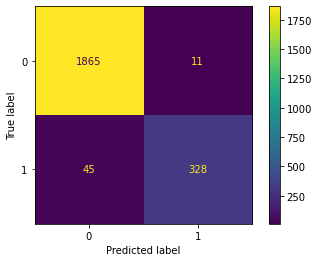

In [112]:
cm = metrics.confusion_matrix(y_val,y_pred,labels=dt_cv.classes_)
disp = metrics.ConfusionMatrixDisplay(confusion_matrix = cm,display_labels = dt_cv.classes_)
disp.plot(values_format='d');

In [113]:
target_labels = ['stayed','left']
print(classification_report(y_val,y_pred,target_names=target_labels))

              precision    recall  f1-score   support

      stayed       0.98      0.99      0.99      1876
        left       0.97      0.88      0.92       373

    accuracy                           0.98      2249
   macro avg       0.97      0.94      0.95      2249
weighted avg       0.97      0.98      0.97      2249



**Evaluating the second model, XGBoost**

In [114]:
y_pred = xgb_cv.best_estimator_.predict(X_val)
y_pred

array([0, 0, 0, ..., 1, 0, 1])

In [115]:
y_val

7528     0
2899     0
8322     0
2985     0
8450     0
        ..
11574    0
7831     0
652      1
5495     0
241      1
Name: left, Length: 2249, dtype: int64

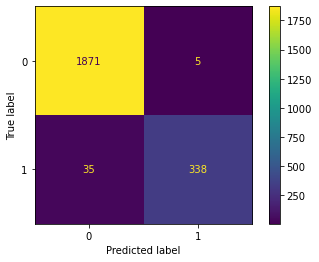

In [116]:
cm = metrics.confusion_matrix(y_val,y_pred,labels=xgb_cv.classes_)
disp = metrics.ConfusionMatrixDisplay(confusion_matrix = cm,display_labels = xgb_cv.classes_)
disp.plot(values_format='d');

In [117]:
target_labels = ['stayed','left']
print(classification_report(y_val,y_pred,target_names=target_labels))

              precision    recall  f1-score   support

      stayed       0.98      1.00      0.99      1876
        left       0.99      0.91      0.94       373

    accuracy                           0.98      2249
   macro avg       0.98      0.95      0.97      2249
weighted avg       0.98      0.98      0.98      2249



**As we are trying to better identify employees at risk of leaving the company, the preferred model here is the XGBoost model. From the 2 confusion matrices, we can see that the decision tree misidentified a total of 45 employees who left as employees who will stay, which is a higher number than that of XGBoost (35). When we look at the precision, recall, and F1-score for employees predicted to leave, XGBoost outperforms in every aspect. Thus, we will use the XGBoost model to plot the feature importance graph later on.**

**Using the XGBoost model to predict on test data**

In [118]:
xgb_cv_pred = xgb_cv.best_estimator_.predict(X_test)

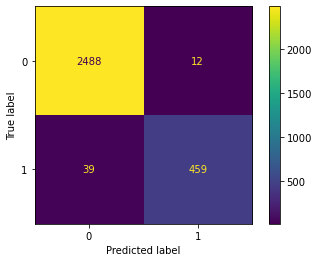

In [119]:
cm = metrics.confusion_matrix(y_test, xgb_cv_pred, labels = xgb_cv.classes_)
disp = metrics.ConfusionMatrixDisplay(confusion_matrix = cm,display_labels = xgb_cv.classes_)
disp.plot(values_format='d');

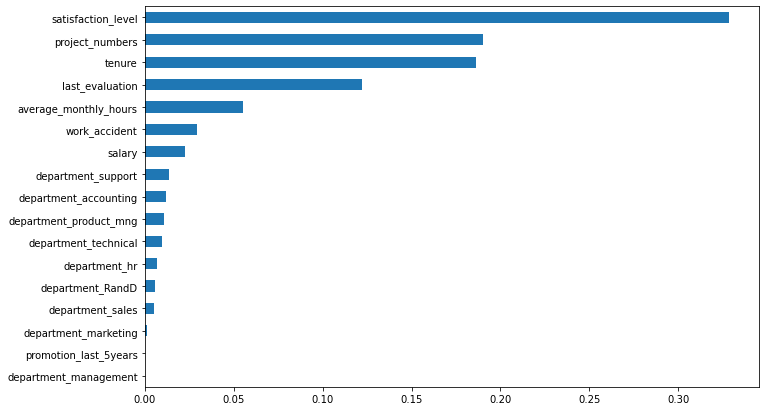

In [120]:
importances = xgb_cv.best_estimator_.feature_importances_
importances_table = pd.Series(importances,index=X_test.columns).sort_values(ascending=True)
importances_table.plot.barh(figsize=(11,7))
plt.show()

# pacE: Execute Stage
- Interpret model performance and results
- Share actionable steps with stakeholders



💭



## Step 4. Results and Evaluation
- Interpret model
- Evaluate model performance using metrics
- Prepare results, visualizations, and actionable steps to share with stakeholders




### Summary of model results

**From the confusion matrix, out of 498 employees who left the company, the model was able to predict 459 of them correctly, with 39 employees incorrectly predicted to stay. Out of 2500 employees who remained, the model accurately predicted 2488 of them to stay, with only a small number (12) incorrectly predicted as likely to leave. Since the model can accurately predict a large number of employees who will leave, it demonstrates itself to be a highly effective tool for predicting the likelihood of employee attrition.**

### Conclusion, Recommendations, Next Steps
**From the feature importance graph, we can see that satisfaction level is a key driver of employee attrition. To address this, we can increase the frequency of rolling out satisfaction surveys. If satisfaction surveys are conducted annually, we can instead conduct them once every 6 months, enabling us to detect and respond to signs of employee resentment much earlier. These surveys can also include open-ended response sections so employees can explain the reasons behind their scores, giving us deeper insight into specific issues. We can also establish a 24/7 complaint reporting channel that is regularly monitored, providing employees the opportunity to voice their concerns anonymously, rather than waiting for the next survey cycle. <br><br> Additionally, the number of projects an employee is responsible for and their tenure also play critical roles in determining whether or not an employee will stay. We should monitor the workload of employees and identify those assigned a high number of projects. While some employees may be ambitious, it is also important to ensure that they do not burn themselves out as they handle more than the average number of projects. These employees should be regularly checked to ensure that they are coping well with the workload, and we should encourage them to be honest and not pressure them to take up any additional projects, as this would likely increase the risk of burnout, which can lead to them leaving the company in the future. <br><br> Lastly, to address tenure, we can look into better work compensation for employees who have worked in the company for a long time. Especially for employees who have worked for close to five years, we can consider increasing their salary or other benefits, as this can better retain them, rather than them having to look for other companies that may offer more attractive compensation. If not, we can also ensure that clear pathways for advancement and opportunities for skill development are provided for employees with several years of work experience. Employees who have worked for only a few years here may not have a strong sense of purpose in the company. Providing these opportunities will give them additional motivation, ensuring that they have a greater goal in the company and are more likely to commit for more than 5 years.**
